## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline
# from watermark import watermark
# print(watermark())
# print(watermark(iversions=True, globals_=globals()))

Last updated: 2022-10-16T11:48:50.748877-10:00

Python implementation: CPython
Python version       : 3.7.13
IPython version      : 7.31.1

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : AMD64 Family 23 Model 8 Stepping 2, AuthenticAMD
CPU cores   : 12
Architecture: 64bit

pandas: 1.3.5



## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path('./Resources/bitstamp.csv'),
    index_col='Timestamp',
    infer_datetime_format=True,
    parse_dates=True
)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129540 entries, 2018-01-01 00:00:00 to 2018-03-31 23:59:00
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Open            129067 non-null  float64
 1   High            129067 non-null  float64
 2   Low             129067 non-null  float64
 3   Close           129540 non-null  object 
 4   BTC Volume      129067 non-null  float64
 5   USD Volume      129067 non-null  float64
 6   Weighted Price  129067 non-null  float64
dtypes: float64(6), object(1)
memory usage: 7.9+ MB


None

<AxesSubplot:xlabel='Timestamp'>

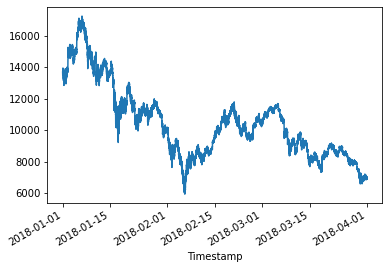

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
display(bitstamp.head())
display(bitstamp.info())
display(bitstamp['Open'].plot())

### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path('./Resources/coinbase.csv'),
    index_col='Timestamp',
    infer_datetime_format=True,
    parse_dates=True
)

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
display(coinbase.head())
display(coinbase.info())

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129540 entries, 2018-01-01 00:00:00 to 2018-03-31 23:59:00
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Open            129322 non-null  float64
 1   High            129322 non-null  float64
 2   Low             129322 non-null  float64
 3   Close           129540 non-null  object 
 4   BTC Volume      129322 non-null  float64
 5   USD Volume      129322 non-null  float64
 6   Weighted Price  129322 non-null  float64
dtypes: float64(6), object(1)
memory usage: 7.9+ MB


None

## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
# YOUR CODE HERE
bitstamp = bitstamp.dropna()
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [7]:
# Use the str.replace function to remove the dollar sign, $
# YOUR CODE HERE
bitstamp.loc[:,'Close'] = bitstamp.loc[:,'Close'].str.replace('$','')
bitstamp.head()


C:\Users\card_.000\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329


### Step 3: Convert the data type of the Close column to a `float`.

In [8]:
# Convert the Close data type to a float
# YOUR CODE HERE
bitstamp.loc[:,'Close'] = bitstamp.loc[:,'Close'].astype('float')
bitstamp

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.00,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,6934.72,28.239049,195789.408220,6933.286106


### Step 4: Review the data for duplicated values, and drop them if necessary.

In [9]:
# Review the data for duplicate values, and drop them if necessary
# YOUR CODE HERE
bitstamp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129067 entries, 2018-01-01 00:00:00 to 2018-03-31 23:59:00
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Open            129067 non-null  float64
 1   High            129067 non-null  float64
 2   Low             129067 non-null  float64
 3   Close           129067 non-null  float64
 4   BTC Volume      129067 non-null  float64
 5   USD Volume      129067 non-null  float64
 6   Weighted Price  129067 non-null  float64
dtypes: float64(7)
memory usage: 7.9 MB


### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [10]:
# Repeat Steps 1–4 for the coinbase DataFrame
# YOUR CODE HERE
coinbase.dropna(inplace=True)
coinbase.loc[:,'Close'] = coinbase.loc[:,'Close'].str.replace('$','').astype('float')
coinbase.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129322 entries, 2018-01-01 00:00:00 to 2018-03-31 23:59:00
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Open            129322 non-null  float64
 1   High            129322 non-null  float64
 2   Low             129322 non-null  float64
 3   Close           129322 non-null  float64
 4   BTC Volume      129322 non-null  float64
 5   USD Volume      129322 non-null  float64
 6   Weighted Price  129322 non-null  float64
dtypes: float64(7)
memory usage: 7.9 MB


C:\Users\card_.000\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [11]:
coinbase

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.00,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,6930.00,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,6933.91,0.776431,5382.532162,6932.405747


## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


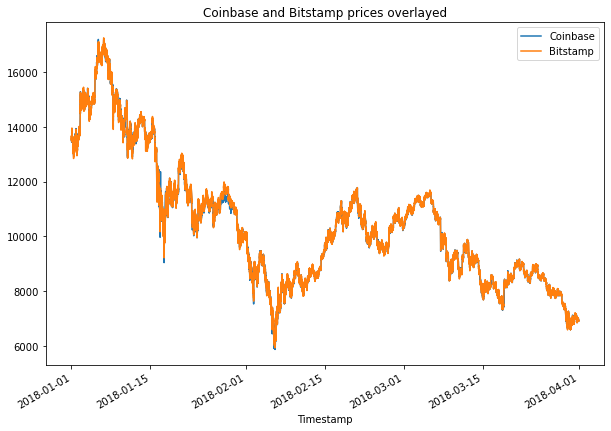

In [112]:
ax = coinbase.loc[:,'Close'].plot(figsize =(10,7), title = 'Coinbase and Bitstamp prices overlayed')

bitstamp.loc[:,'Close'].plot(ax=ax)
ax.legend(['Coinbase','Bitstamp'])

In [13]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp[['Close']]
# Review the first five rows of the DataFrame
bitstamp_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [14]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase[['Close']]
# Review the first five rows of the DataFrame
coinbase_sliced

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44
...,...
2018-03-31 23:55:00,6930.00
2018-03-31 23:56:00,6930.01
2018-03-31 23:57:00,6933.91


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [15]:
# Generate the summary statistics for the bitstamp DataFrame
# YOUR CODE HERE
bitstamp_sliced.describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [16]:
# Generate the summary statistics for the coinbase DataFrame
# YOUR CODE HERE
coinbase_sliced.describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'Bitstamp BTC price'}, xlabel='Timestamp'>

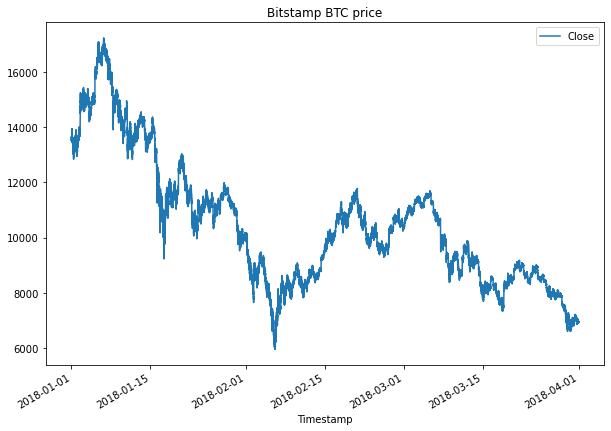

In [17]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
# YOUR CODE HERE
bitstamp_sliced.plot(figsize = (10,7), title='Bitstamp BTC price')

<AxesSubplot:title={'center':'Coinbase BTC price'}, xlabel='Timestamp'>

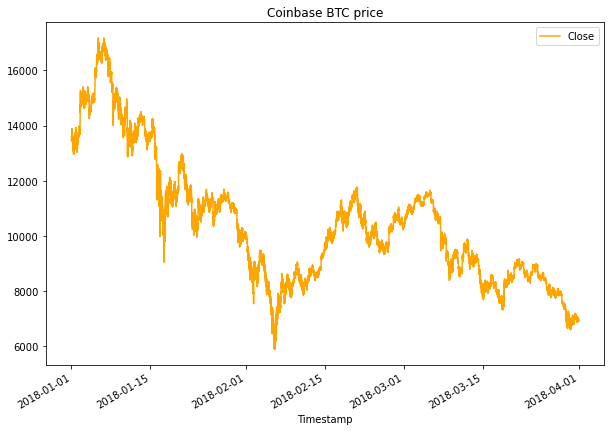

In [18]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
# YOUR CODE HERE
coinbase_sliced.plot(figsize=(10,7), title='Coinbase BTC price', color ='orange')

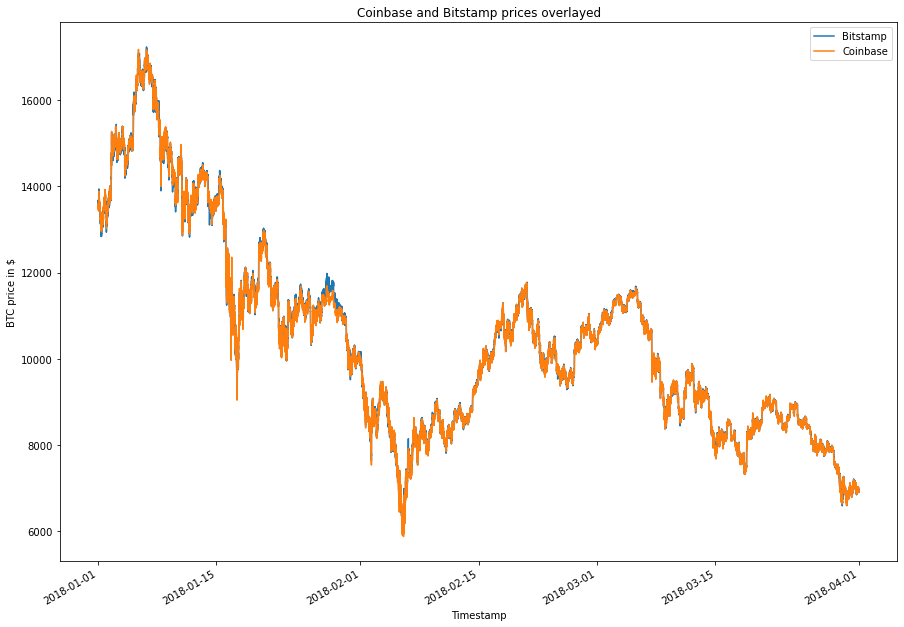

In [113]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE
ax = bitstamp_sliced.plot(figsize =(15,11), title = 'Coinbase and Bitstamp prices overlayed', ylabel= 'BTC price in $' )

coinbase_sliced.plot(ax=ax)
ax.legend(['Bitstamp','Coinbase'])

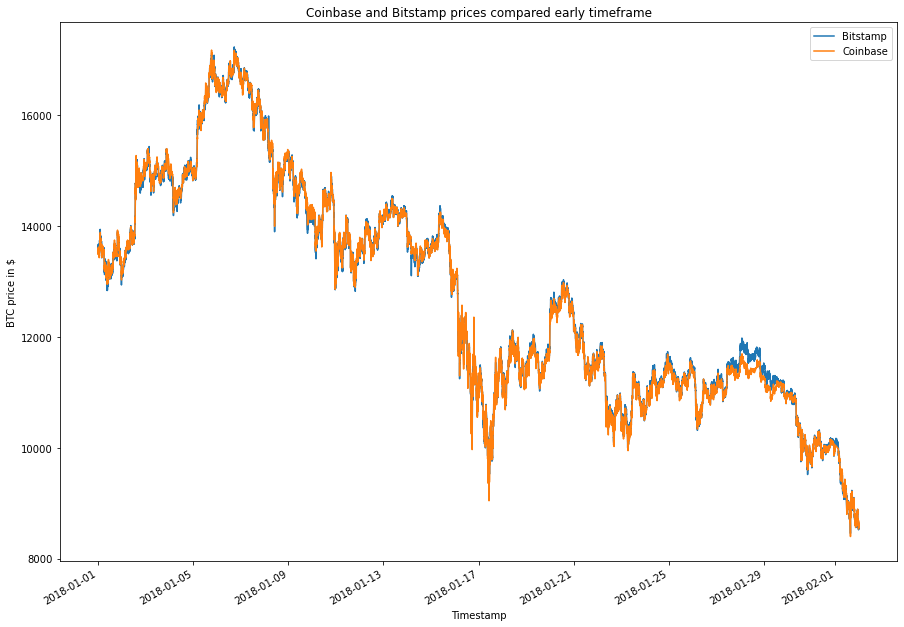

In [114]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE
ax = bitstamp_sliced.loc['2018-01-01':'2018-02-01'].plot(figsize =(15,11), title = 'Coinbase and Bitstamp prices compared early timeframe', ylabel= 'BTC price in $' )

coinbase_sliced.loc['2018-01-01':'2018-02-01'].plot(ax=ax)
ax.legend(['Bitstamp','Coinbase'])

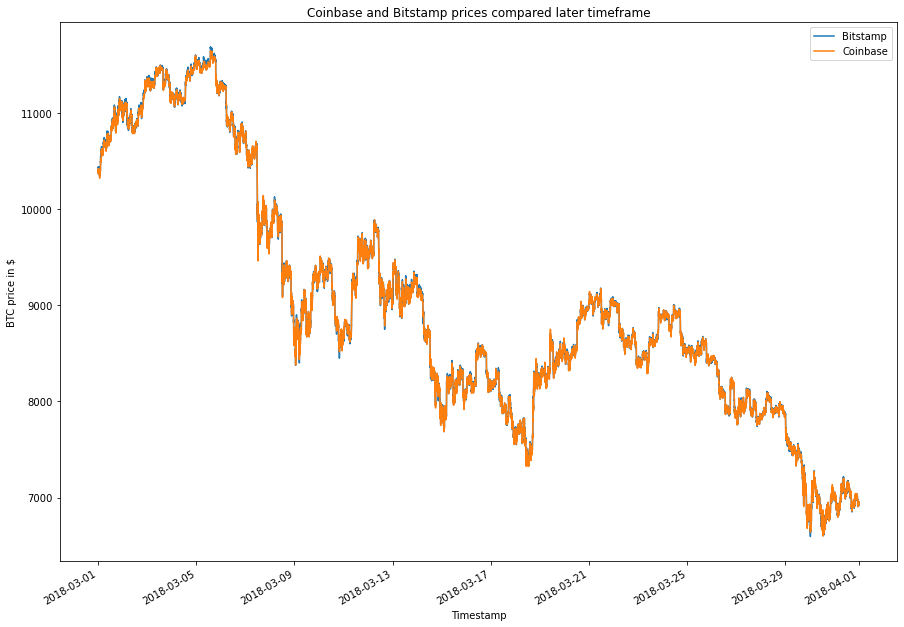

In [115]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
# YOUR CODE HERE
ax = bitstamp_sliced.loc['2018-03-01':'2018-04-01'].plot(figsize =(15,11), title = 'Coinbase and Bitstamp prices compared later timeframe', ylabel= 'BTC price in $' )

coinbase_sliced.loc['2018-03-01':'2018-04-01'].plot(ax=ax)
ax.legend(['Bitstamp','Coinbase'])

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** YOUR ANSWER HERE - 

There is noticeably more spread in the first month compared to the last month of dataset. 

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

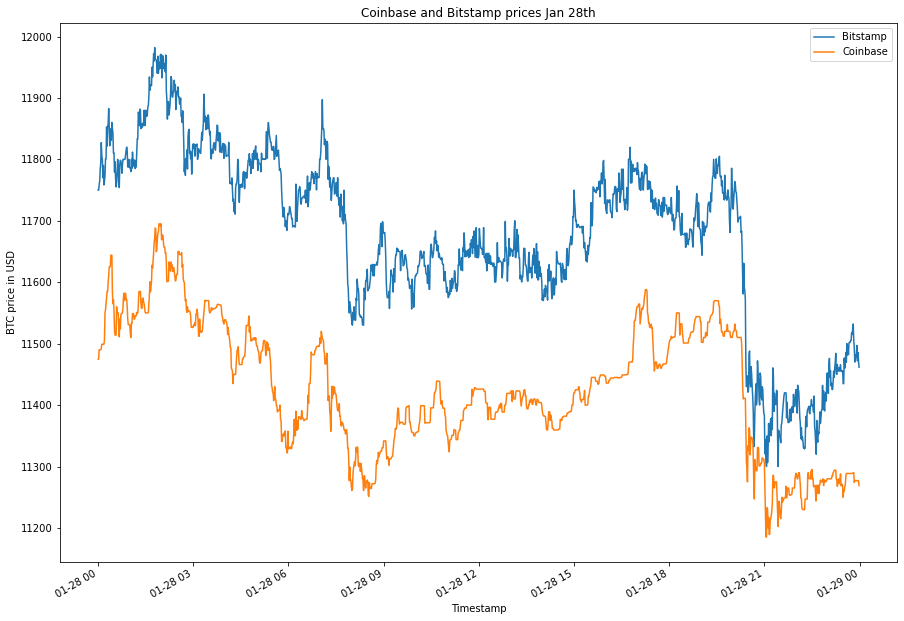

In [132]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
ax = bitstamp_sliced.loc['2018-01-28'].plot(figsize =(15,11), title = 'Coinbase and Bitstamp prices Jan 28th', ylabel='BTC price in USD')

coinbase_sliced.loc['2018-01-28'].plot(ax=ax)
ax.legend(['Bitstamp','Coinbase'])

In [26]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
# This would be a trade buying the BTC on coinbase cheaper and selling it on Bitstamp for more.
arbitrage_spread_early=bitstamp_sliced.loc['2018-01-28'] - coinbase_sliced.loc['2018-01-28']

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

,Close
count,1436.000000
mean,247.552326
std,68.343472
min,55.030000
25%,210.022500
50%,251.180000
75%,290.925000
max,439.010000


<AxesSubplot:title={'center':'Arbitrage spread for early dataframe'}, ylabel='$ earnings per trade'>

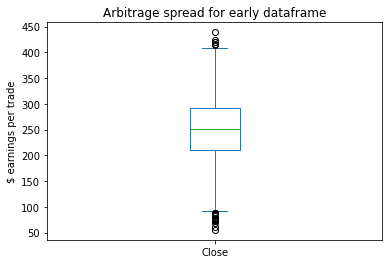

In [116]:
# Visualize the arbitrage spread from early in the dataset in a box plot
# YOUR CODE HERE
arbitrage_spread_early.plot(kind='box', title='Arbitrage spread for early dataframe', ylabel= '$ earnings per trade' )

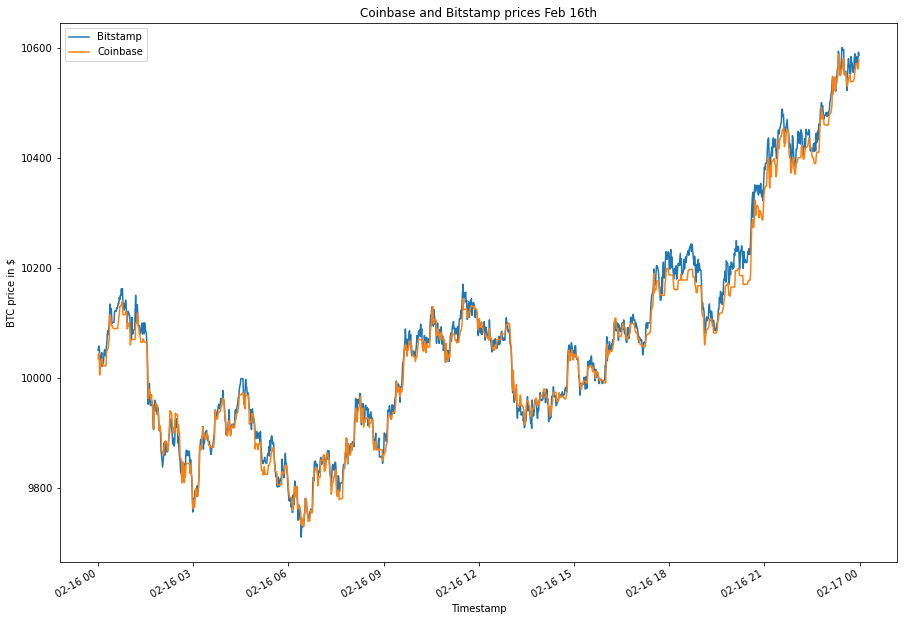

In [117]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
ax = bitstamp_sliced.loc['2018-02-16'].plot(figsize =(15,11), title = 'Coinbase and Bitstamp prices Feb 16th',ylabel= 'BTC price in $')

coinbase_sliced.loc['2018-02-16'].plot(ax=ax)
ax.legend(['Bitstamp','Coinbase'])

In [78]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
# This would also be a trade buying cheaper BTC on coinbase and selling on Bitstamp for more
arbitrage_spread_middle =bitstamp_sliced.loc['2018-02-16'] - coinbase_sliced.loc['2018-02-16']

# Generate summary statistics 
arbitrage_spread_middle.describe()

,Close
count,1438.00000
mean,10.82217
std,16.94882
min,-56.00000
25%,-1.11000
50%,10.07500
75%,21.47250
max,65.05000


<AxesSubplot:title={'center':'Arbitrage spread for middle dataframe'}, ylabel='$ earnings per trade'>

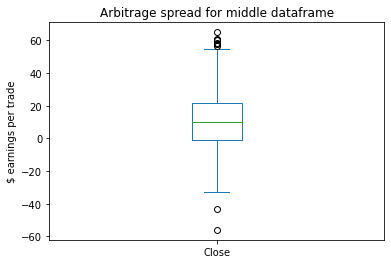

In [118]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
# YOUR CODE HERE
arbitrage_spread_middle.plot(kind='box', title='Arbitrage spread for middle dataframe', ylabel= '$ earnings per trade')

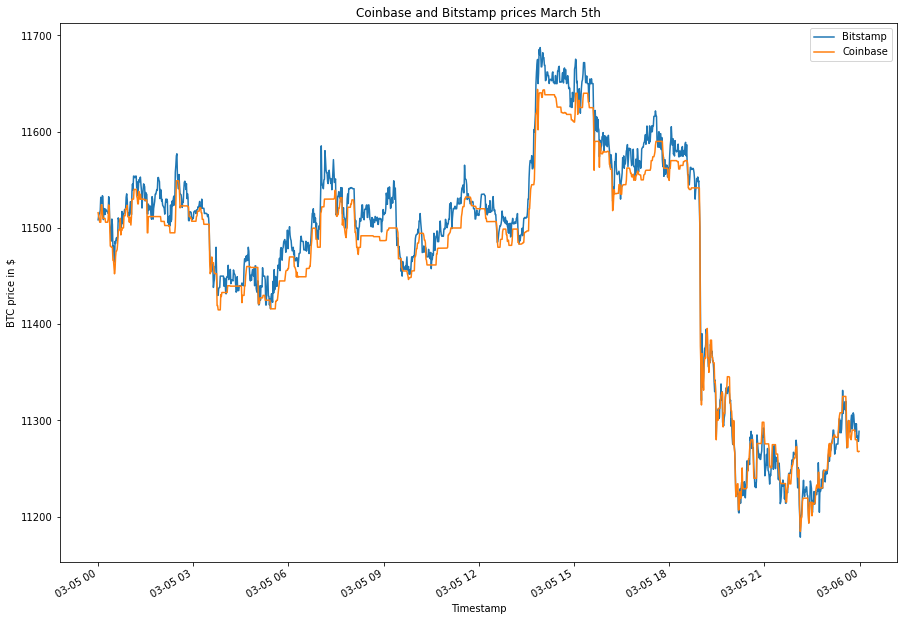

In [119]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
ax = bitstamp_sliced.loc['2018-03-05'].plot(figsize =(15,11), title = 'Coinbase and Bitstamp prices March 5th', ylabel= 'BTC price in $')

coinbase_sliced.loc['2018-03-05'].plot(ax=ax)
ax.legend(['Bitstamp','Coinbase'])

In [82]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
# This would be a trade but cheaper BTC from coinbase and selling it on Bitstamp for more
arbitrage_spread_late = bitstamp_sliced.loc['2018-03-05'] - coinbase_sliced.loc['2018-03-05']

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

,Close
count,1437.000000
mean,11.817683
std,14.276780
min,-33.180000
25%,2.940000
50%,11.500000
75%,20.470000
max,68.280000


<AxesSubplot:title={'center':'Arbitrage spread for later dataframe'}, ylabel='$ earnings per trade'>

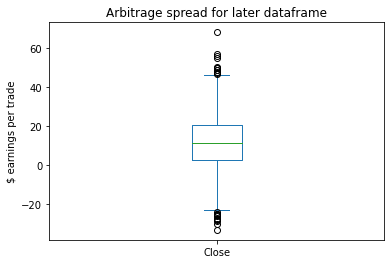

In [120]:
# Visualize the arbitrage spread from late in the dataset in a box plot
# YOUR CODE HERE
arbitrage_spread_late.plot(kind='box', title='Arbitrage spread for later dataframe', ylabel= '$ earnings per trade')

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [121]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one    
display(arbitrage_spread_early)
# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# YOUR CODE HERE
spread_return_early = arbitrage_spread_early[arbitrage_spread_early>0]
display(spread_return_early.describe())

,Close
Timestamp,
2018-01-28 00:00:00,275.38
2018-01-28 00:01:00,275.00
2018-01-28 00:02:00,268.77
2018-01-28 00:03:00,275.03
2018-01-28 00:04:00,294.26
...,...
2018-01-28 23:55:00,220.10
2018-01-28 23:56:00,195.11
2018-01-28 23:57:00,208.74


,Close
count,1436.000000
mean,247.552326
std,68.343472
min,55.030000
25%,210.022500
50%,251.180000
75%,290.925000
max,439.010000


In [122]:
# step 1 for middle dataset
# showing current arbitrage spread for the dataframe
display(arbitrage_spread_middle)
# creating dataframe for only positive returns 
spread_return_middle=arbitrage_spread_middle[arbitrage_spread_middle>0]
# dropping any NaN values to clean dataframe
spread_return_middle = spread_return_middle.dropna()
# showing new spread return dataframe
display(spread_return_middle.describe())

,Close
Timestamp,
2018-02-16 00:00:00,15.00
2018-02-16 00:01:00,13.05
2018-02-16 00:02:00,12.13
2018-02-16 00:03:00,37.61
2018-02-16 00:04:00,-3.41
...,...
2018-02-16 23:55:00,12.53
2018-02-16 23:56:00,0.88
2018-02-16 23:57:00,18.95


,Close
count,1039.000000
mean,18.456487
std,12.919400
min,0.130000
25%,8.400000
50%,15.940000
75%,26.220000
max,65.050000


In [123]:
# step 2 for late dataset 
# showing current arbitrage spread for the dataframe
display(arbitrage_spread_late)
# creating dataframe for only positive returns 
spread_return_late=arbitrage_spread_late[arbitrage_spread_late>0]
# dropping any NaN values to clean dataframe
spread_return_late = spread_return_late.dropna()
# showing new spread return dataframe
display(spread_return_late.describe())

,Close
Timestamp,
2018-03-05 00:00:00,-7.43
2018-03-05 00:01:00,0.36
2018-03-05 00:02:00,4.74
2018-03-05 00:03:00,9.24
2018-03-05 00:04:00,12.12
...,...
2018-03-05 23:55:00,2.29
2018-03-05 23:56:00,15.69
2018-03-05 23:57:00,10.47


,Close
count,1155.000000
mean,16.740208
std,10.860019
min,0.020000
25%,8.880000
50%,14.790000
75%,23.195000
max,68.280000


#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [65]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = spread_return_early/ coinbase_sliced.loc['2018-01-28']

# Review the spread return DataFrame
spread_return_early.describe()

,Close
count,1436.000000
mean,0.021648
std,0.005961
min,0.004885
25%,0.018369
50%,0.021897
75%,0.025292
max,0.038510


In [81]:
# doing step 2 for middle date.
spread_return_middle = spread_return_middle / coinbase_sliced.loc['2018-02-16']
# Review the spread return DataFrame
spread_return_middle.describe()

,Close
count,1039.000000
mean,0.001822
std,0.001264
min,0.000013
25%,0.000831
50%,0.001572
75%,0.002582
max,0.006384


In [69]:
# doing step 2 for later date
spread_return_late = spread_return_late / coinbase_sliced.loc['2018-03-05']
# Review the spread return DataFrame
spread_return_late.describe()

,Close
count,1155.000000
mean,0.001455
std,0.000940
min,0.000002
25%,0.000772
50%,0.001288
75%,0.002023
max,0.005929


#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [71]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early>.01]

# Review the first five profitable trades
profitable_trades_early.head()

,Close
Timestamp,
2018-01-28 00:00:00,0.023999
2018-01-28 00:01:00,0.023965
2018-01-28 00:02:00,0.023392
2018-01-28 00:03:00,0.023936
2018-01-28 00:04:00,0.025610


In [76]:
# step 3 for middle dataset
profitable_trades_middle = spread_return_middle[spread_return_middle>.01]
# Review the last five profitable trades
profitable_trades_middle.describe()
# It would seem that after running this code no profitable trades would exist on this date.

,Close
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [85]:
# step 3 for late dataset
profitable_trades_late = spread_return_late[spread_return_late>.01]
# Review the last five profitable trades
profitable_trades_late.describe()
# It would seem that after running this code no profitable trades would exist on this date.

,Close
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [86]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
# YOUR CODE HERE
profitable_trades_early.describe()

,Close
count,1378.000000
mean,0.022201
std,0.005421
min,0.010087
25%,0.019016
50%,0.022191
75%,0.025413
max,0.038510


# Answer to how average returns compared across chosen dates
It would seem that after filtering for profitable trades only the one date i selected, January 28th, had profitable trades. The other two dates had no trades with a profit greater than 0.6% so not enough to cover the 1% trading fee, resulting in an easy way to lose money. Only the early date in January provided a profitable arbitrage opportunity to continue analyzing.

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [88]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * coinbase_sliced.loc['2018-01-28']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
# YOUR CODE HERE
profit_per_trade_early

,Close
Timestamp,
2018-01-28 00:00:00,275.38
2018-01-28 00:01:00,275.00
2018-01-28 00:02:00,268.77
2018-01-28 00:03:00,275.03
2018-01-28 00:04:00,294.26
...,...
2018-01-28 23:55:00,220.10
2018-01-28 23:56:00,195.11
2018-01-28 23:57:00,208.74


#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [89]:
# Generate the summary statistics for the early profit per trade DataFrame
# YOUR CODE HERE
profit_per_trade_early.describe()

,Close
count,1378.000000
mean,253.931996
std,62.057953
min,113.970000
25%,217.272500
50%,254.150000
75%,292.987500
max,439.010000


<AxesSubplot:title={'center':'Profit per trade for Jan 28th'}, xlabel='Timestamp', ylabel='$ earnings per trade'>

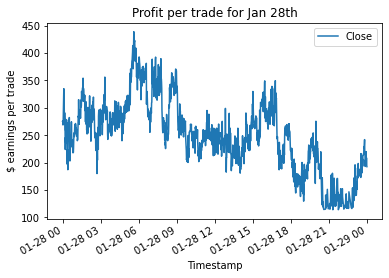

In [124]:
# Plot the results for the early profit per trade DataFrame
# YOUR CODE HERE
profit_per_trade_early.plot(title='Profit per trade for Jan 28th', ylabel= '$ earnings per trade')

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [131]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
# YOUR CODE HERE
profit_per_trade_early.sum()

Close    349918.29
dtype: float64

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [92]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early =profit_per_trade_early.cumsum()

<AxesSubplot:title={'center':'Cumulative Bitcoin profits on January 28th'}, xlabel='Timestamp', ylabel='Profits in USD'>

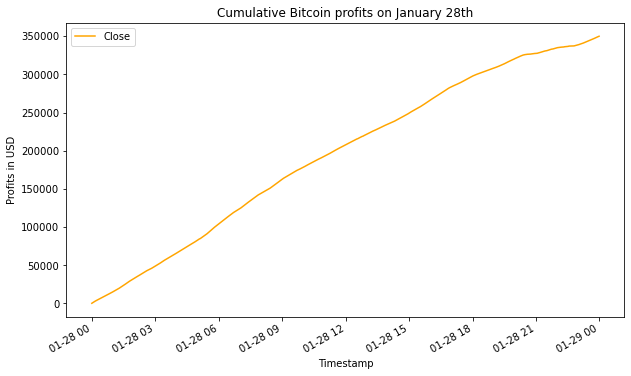

In [134]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# YOUR CODE HERE
cumulative_profit_early.plot(figsize = (10,6), title = 'Cumulative Bitcoin profits on January 28th', color= 'orange', ylabel='Profits in USD' )

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** YOUR ANSWER HERE - 

Seeing as my profit information for the later dates disappeared once i filtred for profitable trades above 1%, i would definitely say that the arbitrage opportunities faded quickly over time in this data set. We only had data from jan-apr in 2018, a period where bitcoin was falling from its recent highs finding a new bottom. The early days definitely provided some very lucrative opportunities though for those who had the ability to take advantage of the arbitrage. This is very evident with the fact that my early data set netted almost $350,000 in one day of trading.

I did one more data analysis below for January 29th to see if that day could provide profits, and it seemed to earn about $139,000 which definitely also isn't bad. So it would seem there was opportunity early on, but by now the opporunity fades quickly and you have to have some insanely fast code to take advantage of it. 

<AxesSubplot:title={'center':'Cumulative profits on Jan 29th'}, xlabel='Timestamp'>

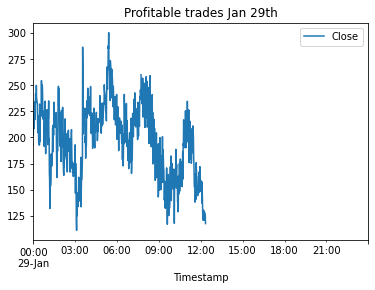

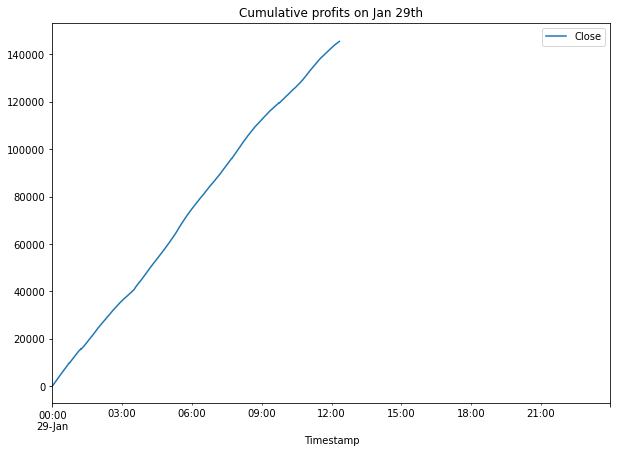

In [111]:
# test dataset to do one extra day of data and see possible profits

arbitrage_spread_test = bitstamp_sliced.loc['2018-01-29'] - coinbase_sliced.loc['2018-01-29']
# Filtering the spread data for only positive and dropping NaN
spread_return_test = arbitrage_spread_test[arbitrage_spread_test>0]
spread_return_test = spread_return_test.dropna()
# dividing by cost of BTC to get % return for the arbitrage trades 
spread_return_test = spread_return_test / coinbase_sliced.loc['2018-01-29']
# filtering for trades only above 1% 
profitable_trades_test = spread_return_test[spread_return_test>.01]
# dropping any NaN values
profitable_trades_test = profitable_trades_test.dropna()
# finding $ profit per profitable trade 
profit_test = profitable_trades_test * coinbase_sliced.loc['2018-01-29']
# sum profits which ended up being 139,000
test_sum = profit_test.sum()
# plotting profitable trades to see them on a chart. 
profit_test.plot(title='Profitable trades Jan 29th')
# generate cumulative profits for the day 
cumulative_test = profit_test.cumsum()
# plot those profits on a graph
cumulative_test.plot(figsize = (10,7), title='Cumulative profits on Jan 29th')


# Generate summary statistics for the late DataFrame
#arbitrage_spread_test.describe()
#spread_return_test.describe()